In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Showing Some Data

- ## Constructing a Data Loader

In [2]:
pickles_path_train = [
  "./datasets/cifar10/data_batch_1",
  "./datasets/cifar10/data_batch_2",
  "./datasets/cifar10/data_batch_3",
  "./datasets/cifar10/data_batch_4",
]

In [29]:
def read_pickle(path):
    with open (path, "rb") as file:
        pickle_dict = pickle.load(file , encoding = "latin1")
    return np.array(pickle_dict["labels"]), pickle_dict["data"]

data = list()
labels = list()

for path in pickles_path_train:
    path_label, path_data = read_pickle(path)
    data.append(path_data)
    labels.append(path_label)
    
data = np.concatenate(data)
labels = np.concatenate(labels)
labels_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
data.shape, labels.shape

((40000, 3072), (40000,))

# Sampling n Data from Each Category

In [5]:
samples_per_category = 10

unique_labels = np.unique( labels.tolist() )
num_labels = len(unique_labels)

random_samples = dict()

for label in unique_labels:
    label_mask = labels == label
    
    label_samples = data[label_mask, :]
    
    label_random_samples = label_samples[
        np.random.randint(0, label_samples.shape[0], (samples_per_category,)),
        :
    ]
    
    random_samples[label] = label_random_samples

# Plotting the Sampled Data

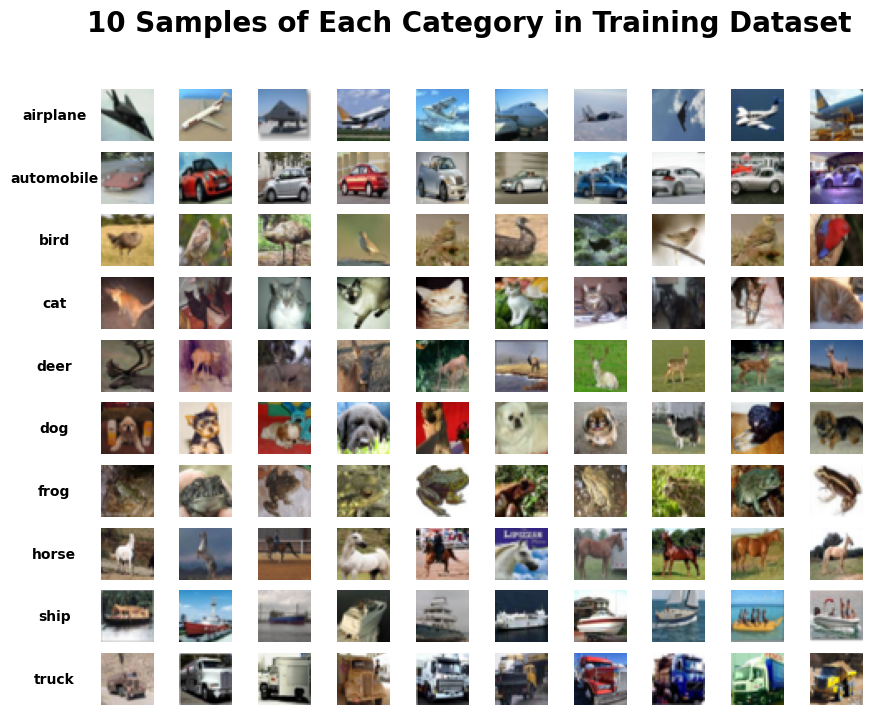

In [39]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle(f"{samples_per_category} Samples of Each Category in Training Dataset", fontweight="bold", fontsize=20)


for ix, label in enumerate(unique_labels):
    for jx, sample in enumerate(random_samples[label]):
        sample = sample.reshape(3, 32, 32)
        sample = sample.transpose(1, 2, 0)
        # sample = transforms.functional.to_pil_image(sample[[2, 1, 0], :, :]/255)
        # sample = transforms.functional.to_pil_image(sample)
        
        subplot_index = samples_per_category * ix + jx + 1
        ax = plt.subplot(num_labels, samples_per_category, subplot_index)
        plt.imshow(sample)
        
        plt.xticks([])
        plt.yticks([])
        
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)
        
        if jx == 0:
            ax.set_ylabel(labels_name[label], rotation=0, va='center', labelpad=30, fontweight='bold')
        

# Calculating $\mu$ and $\sigma$ of Training Data

In [11]:
mu = np.mean(data, axis=0)
sigma = np.std(data, axis=0)

mu, sigma

(tensor([130.8991, 130.2976, 131.2357,  ..., 114.0417, 114.1040, 114.5743],
        dtype=torch.float64),
 tensor([73.3999, 72.4233, 72.1947,  ..., 65.0088, 65.3725, 66.2379],
        dtype=torch.float64))